# Workshop: Olympic Medals

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1920px-Olympic_rings_without_rims.png" width=300>

First clone the repository at [https://github.com/daniprec/BAM-Coding-Lab](https://github.com/daniprec/BAM-Coding-Lab)

You will find the data inside `data/olympics`.


---

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

---

## Regression Analysis

In [26]:
df = pd.read_csv("../data/olympics/medals_gdp.csv")

df.head(5)

,year,country_noc,medals,GDP
0,1992,ARG,1,16190.511
1,1992,AUS,27,30180.310
2,1992,AUT,23,38774.492
3,1992,BEL,3,36426.992
4,1992,BRA,3,10103.788


Let’s examine the medals won by the USA during the Summer Olympics in relation to the country's GDP for each year.

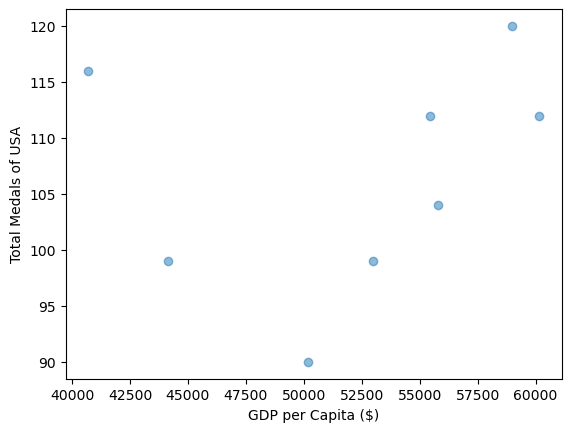

In [27]:
country = "USA"
mask_country = df["country_noc"] == country
# Take only the summer games (every 4 years from 2020 backwards)
mask_summer = df["year"] % 4 == 0
df_country = df[mask_country & mask_summer]
x = df_country["GDP"].values
y = df_country["medals"].values

plt.scatter(x, y, alpha=0.5)
plt.xlabel("GDP per Capita ($)")
plt.ylabel(f"Total Medals of {country}")
plt.show()
plt.close()

The points appear to follow a $x^2$ shape. Can we fit a quadratic curve to the data?

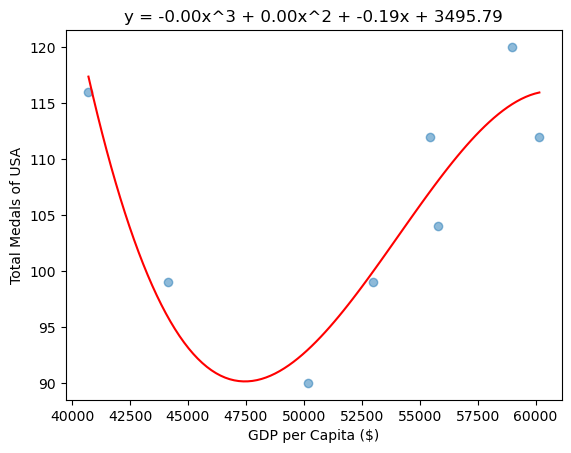

In [28]:
country = "USA"
mask_country = df["country_noc"] == country
# Take only the summer games (every 4 years from 2020 backwards)
mask_summer = df["year"] % 4 == 0
df_country = df[mask_country & mask_summer]
x = df_country["GDP"].values
y = df_country["medals"].values

# Fit a third order polynomial using numpy
p = np.polyfit(x, y, 3)
x_pred = np.linspace(x.min(), x.max(), 100)
y_pred = np.polyval(p, x_pred)

# Plot the data and the polynomial
plt.scatter(x, y, alpha=0.5)
plt.plot(x_pred, y_pred, color="red")
plt.xlabel("GDP per Capita ($)")
plt.ylabel(f"Total Medals of {country}")

# Show the polynomial coefficients in the plot title
plt.title(f"y = {p[0]:.2f}x^3 + {p[1]:.2f}x^2 + {p[2]:.2f}x + {p[3]:.2f}")

plt.show()
plt.close()

In [29]:
# Compute the mean relative error of the model
y_pred = np.polyval(p, x)
mean_relative_error = 100 * np.mean(np.abs(y - y_pred) / y)
print(f"Mean Relative Error: {mean_relative_error:.1f} %")

Mean Relative Error: 3.1 %


In [30]:
# Compute the R^2 score of the model with numpy
y_mean = np.mean(y)
sst = np.sum((y - y_mean) ** 2)
ssr = np.sum((y - y_pred) ** 2)
r2 = 1 - ssr / sst
print(f"R^2 Score: {r2:.3f}")
# How to read the R^2 score:
# 0.0 - 0.3: Weak correlation
# 0.3 - 0.7: Moderate correlation
# 0.7 - 1.0: Strong correlation
# We want the R^2 score to be as close to 1 as possible

R^2 Score: 0.856


<div style="color: red">
<strong>Challenge:</strong>
</div>

There’s still room to improve the regression:

1. Some Olympic Games may have featured fewer sports. Consider computing the ratio of medals won relative to the total number of medals for that year.
2. The coefficients are challenging to interpret. Transforming the GDP values might provide clearer insights.

Additionally, new questions arise:

1. Do all countries follow the same pattern? Perform a correlation analysis between the coefficients for each country.
2. Can we group countries based on the behavior of their curves?
3. With the GDP data for 2024, can we estimate the number of medals likely to be won?